# AB-тестирование
## Задание AB.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---
**Баллы за задание:**

* Задача 1 — 20 баллов
* Задача 2 — 30 баллов
* Задача 3 — 60 баллов
* Задача 4 — 30 баллов
* Задача 5 — 50 баллов
* Задача 6 — 50 баллов

In [1]:
# Bot check

# HW_ID: ds_ab2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

from statsmodels.stats.proportion import proportion_confint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from catboost import CatBoostRegressor
from statsmodels.formula.api import ols

sns.set(palette='Set2', style='whitegrid', font_scale=1.2)

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

## CUPED

---
### Задача 1.

Пусть в АБ-тесте использовались две независимые группы одинакового размера. Рассмотрим модель $y(t) = \theta_0 + \theta_1 t$, где $t \in \{0, 1\}$ &mdash; номер группы, а $y(t)$ &mdash; целевая метрика.

Покажите, что рассмотренный нами t-test для сравнения этих групп эквивалентен критерию Вальда для проверки гипотезы $\mathsf{H}_0\colon \theta_1=0$ при использовании оценки Уайта HC0, устойчивой к гетероскедастичности. В качестве остатков нужно рассматривать исходные остатки без поправки.

Пусть $X = (X_1, X_2, \ldots, X_n)$ - тестовая выборка, $Y = (Y_1, Y_2, \ldots, Y_m )$ - контрольная. Линейная регрессия имеет вид:

$$(Y^T, X^T)^T = \begin{pmatrix}
1 & 0 \\
\vdots & \vdots \\
1 & 1
\end{pmatrix} (\theta_0, \theta_1)^T + \varepsilon$$

Тогда модель даёт следующую оценку параметров: 

$$\hat\theta_0 = \overline Y, \qquad \hat\theta_1 = \overline{X} - \overline{Y}$$

А "признаки" - это матрица $U = \begin{pmatrix}
1 & 0 \\
\vdots & \vdots \\
1 & 1
\end{pmatrix}$

А рассмотренный нами t-test строится по статистике $T$:

$$T = \frac{\overline X - \overline Y}{\sqrt{S_X^2/n + S_Y^2/m}} \rightarrow^d N(0, 1)$$

Остатки имеют вид 
$$e_i = \left[(Y^T, X^T)^T - \begin{pmatrix}
1 & 0 \\
\vdots & \vdots \\
1 & 1
\end{pmatrix} (\hat\theta_0, \hat \theta_1)^T \right]_i$$
$$e_i = Y_i - \overline Y \qquad i \in \overline{1,m}$$
$$e_i = X_i - \overline Y - (\overline X - \overline Y) = X_i - \overline X \qquad i \in \overline{m+1,m+n}$$

Оценка Уайта с $HC0$ имеет вид:

$$\hat \Sigma = (U^T U)^{-1} U^T \text{diag}(e_1^2, \ldots, e_{n+m}^2) U (U^T U)^{-1}$$

После нехитрых преобразований имеем 

$$(U^T U) = \begin{pmatrix}
m + n & n \\
n & n
\end{pmatrix}$$

$$(U^T U)^{-1} = \frac{1}{mn}\begin{pmatrix}
n & -n \\
-n & m+n
\end{pmatrix}$$

$$U^T \text{diag} (e^2) U = \begin{pmatrix}
\sum_{i=1}^{m+n} e_i^2 & \sum_{i=m+1}^{m+n} e_i^2 \\
\sum_{i=m+1}^{m+n} e_i^2 & \sum_{i=m+1}^{m+n} e_i^2
\end{pmatrix} = \begin{pmatrix}
(n-1)^2 S_X^2 + (m-1)^2 S_Y^2 & (m-1)^2 S_Y^2 \\
(m-1)^2 S_Y^2 & (m-1)^2 S_Y^2
\end{pmatrix}$$

Итого:

$$\hat \Sigma = \frac{1}{m^2n^2} \begin{pmatrix}
\ldots & \ldots \\
\ldots & n^2m S_Y^2 + nm^2 S_X^2
\end{pmatrix}$$

Значит искомая дисперсия для $\theta_1$: 
$$\frac{S_Y^2}{m} + \frac{S_X^2}{n}$$

Совпадает с дисперсией $\overline X - \overline Y$ в статистике $T$. То есть, критерий Вальда совпадает с искомым t-test

---
### Задача 2.

Рассмотрим модель линейной регрессии первого шага стандартного метода CUPED
$y(x) = \theta_0 + \theta_1 x$, где $x$ &mdash; ковариата, а $y(x)$ &mdash; целевая метрика.

Покажите, что оценка $\theta_1$ методом наименьших квадратов совпадает с коэффициентом стандартного CUPED-преобразования.

Минимизируем квадратичный лосс (при известных выборках $Y$, $X$)
$$L(\theta_0, \theta_1) = \sum_{i = 1}^n (Y_i - \theta_0 - \theta_1 X_i)^2$$
$$dL = -2 \sum_{i = 1}^n (Y_i - \theta_0 - \theta_1 X_i) d\theta_0 - 2 \sum_{i = 1}^n X_i(Y_i - \theta_0 - \theta_1 X_i) d\theta_1$$

Откуда при минимуме имеем 
$$\overline Y - \hat\theta_0 - \hat\theta_1 \overline X = 0$$
$$\sum_{i=1}^n X_iY_i - n \hat \theta_0 \overline X - n \hat \theta_1 \overline {X^2} = 0$$


Подставляя $\theta_0$:
$$\sum_{i=1}^n X_i Y_i - n \overline Y \cdot \overline X - (n\hat \theta_1) (\overline{X^2} - \overline X^2) = 0$$
$$\hat \theta_1 = \frac{\frac{1}{n}\sum X_i Y_i - \overline Y \cdot \overline X}{\mathbb D X} = CUPED(y, x)$$

То есть что и требовалось

---
### Задача 3.

Провалидируйте и сравните методы CUPED через линейную регрессию:

На занятии мы рассмотрели несколько методов обобщения CUPED с помощью линейной регрессии:
* стандартный двухшаговый,
* комбинированный одношаговый,
* комбинированный двухшаговый.

Провалидируйте эти методы по величине вероятности ошибки I рода и сравните их по мощности. В качестве данных рассмотрите
* простые искусственные данные из ноутбука с занятия,
* искусственные данные с нелинейной зависимостью от ковариаты и гетероскедастичностью.

Константы

In [3]:
total_size = 10_000  # Общее количество объектов в данных
sample_size = 200  # Размер выборки
n_iter = 100  # Количество итераций семплирования
alpha = 0.05  # теор вероятность ошибки первого рода

lw = 5  # Толщина линий на графиках

Генерация выборок и CUPED преобразование

In [4]:
def generate_train_test_sample(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3
):
    '''
    Генерация всей совокупности объектов

    sample_size -- размер выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- доля увеличения дисперсии на экспериментальном периоде

    Возвращает данные за предэкспериментальный и экспериментальный периоды.
    '''

    base = np.random.gamma(shape=shape, scale=scale, size=sample_size)

    data = pd.DataFrame()

    data['pilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor
    )
    data['prepilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor
    )

    return data


def generate_two_independent_samples(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3,
    generation_function=generate_train_test_sample
):
    '''
    Генерация двух независимых выборок

    sample_size -- размер каждой выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- доля увеличения дисперсии на экспериментальном периоде
    generation_function -- функция генерации выборок

    Возвращает данные за предэкспериментальный и экспериментальный периоды.
    '''

    return [
        generation_function(
            sample_size=sample_size, shape=shape, scale=scale, scale_factor=scale_factor
        )
        for _ in range(2)
    ]

def cuped_transform(
    x_data, y_data, target_name='pilot', covariate_name='prepilot', return_theta=False
):
    '''
    Выполняет CUPED-преобразование.
    
    :param x_data: данные тестовой группы
    :param y_data: данные контрольной группы
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param return_theta: возвращать ли значение theta
    :return: таблицы с добавленными столбцами и theta
    '''

    theta = (
        np.cov(x_data[covariate_name], x_data[target_name])[0, 1] \
        + np.cov(y_data[covariate_name], y_data[target_name])[0, 1]
    ) / (
        x_data[covariate_name].var(ddof=0) + y_data[covariate_name].var(ddof=0)
    )

    x_data['cuped'] = x_data[target_name] - theta*x_data[covariate_name]
    y_data['cuped'] = y_data[target_name] - theta*y_data[covariate_name]

    if return_theta:
        return x_data, y_data, theta
    else:
        return x_data, y_data

def cuped_ttest(x_data, y_data, target_name='pilot', covariate_name='prepilot', alpha=0.05):
    '''
    Абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о cuped-преобразовании
    :param y_data: выборка вместе с информацией о cuped-преобразовании
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param alpha: теор вероятность ошибки первого рода
    :return: статистика критерия, p-value
    '''
    
    x_data, y_data = cuped_transform(x_data, y_data, target_name=target_name, covariate_name=covariate_name)
    return sps.ttest_ind(x_data['cuped'], y_data['cuped'])

Код экспериментов

In [48]:
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound


def visualization(prob_reject, left_bound, right_bound,
                  show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2), title=None):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    
    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7,
                    weights=np.ones(len(pvals)) / len(pvals))
            plt.title('Распределение p-value')

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(
            f'Доля отвержений = {100*prob_reject:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()
        
        
def draw_power(powers, left_powers, right_powers, effects_list=np.linspace(0, 0.1, 11), label=None, 
               title='Графики мощности', new_figure=False):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    powers -- оценка мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    if new_figure:
        plt.figure(figsize=(10, 4))
    
    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)
    
    if new_figure:
        plt.hlines(0.8, effects_list[0], effects_list[-1], color='black', alpha=0.5,
                   label='Мощность 0.8 (пересечение — MDE)')
    plt.legend()
    plt.xlabel('Размер относительного эффекта')
    plt.ylabel('Мощность')
    plt.title(title)

def add_effect(x, effect, target_name='pilot', relative_effect=True):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    target_name -- имя столбца с целевой метрикой
    relative_effect -- является ли эффект относительным или абсолютным
    
    Возвращает:
    x -- выборка с добавленным эффектом
    '''
    
    x_copy = x.copy()
    try:
        if relative_effect:
            x_copy[target_name] *= (1 + effect)
        else:
            x_copy[target_name] += effect
    except:
        if relative_effect:
            x_copy *= (1 + effect)
        else:
            x_copy += effect
            
    return x_copy

def run_experiments(
    test, generate_samples,
    n_iter=10000, sample_size=1000, effect=0, relative_effect=True, 
    alpha=0.05, target_name='pilot', draw=False, title=None, show_pvals=True,
    add_effect_as_func=False
):
    '''
    Проведение серии AA-тестов на искусственных выборках.
    
    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    add_effect_as_func -- добавлять ли эффект как функцию в тест
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    '''

    n_rejects = 0  # количество отвержений H_0
    pvals = []  # значения p-value

    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x_data, y_data = generate_samples(size=sample_size)
        
        # Добавляем эффект, если хотим оценить мощность
        if not add_effect_as_func:
            x_data = add_effect(x_data, effect, target_name=target_name,
                                relative_effect=relative_effect)
            pvals.append(test(x_data, y_data)[1])
        else:
            pvals.append(test(x_data, y_data, lambda x: add_effect(x, effect, 
                                                                   target_name=target_name,
                                relative_effect=relative_effect))[1])
        n_rejects += (pvals[-1] < alpha)

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    
    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject, left_bound, right_bound, show_pvals, 
            pvals, alpha, figsize, title
        )
        
    return prob_reject, (left_bound, right_bound)


def estimate_power(
    test, generate_samples, 
    n_iter=10000, sample_size=1000, effects_list=np.linspace(0, 0.1, 11), relative_effect=True, 
    alpha=0.05, target_name='pilot',
    add_effect_as_func=False
):
    '''
    Проведение серии тестов на искусственных выборках для оценки мощности.
    
    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    '''
    
    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))
    
    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test, generate_samples, 
            n_iter=n_iter, sample_size=sample_size, effect=effect, relative_effect=relative_effect, 
            alpha=alpha, target_name=target_name, draw=False,
            add_effect_as_func=add_effect_as_func
        )
        
    return powers, left_bounds, right_bounds

CUPED через линейную регрессию (параметр "type_reg" будет отвечать за тип - двухшаговость и тд)

In [49]:
def regression_ttest(x_data, y_data, cuped=False, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[],
                     type_reg='default-two-step'):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию
    
    Аргументы:
    x, y -- выборки одинакового размера
    :param cuped: применять ли cuped
    :param sample_name: имя столбца с целевым признаком
    :param covariate_names: массив имен столбцов-ковариат
    :param type_reg: тип регресии. Возможные знаечения:
     'comb-two-step', 'comb-one-step' или 'default-two-step'
    
    
    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    
    # добавляем столбец с индикатором тестовой группы
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    # объединяем тест и контроль в один датасет
    data = pd.concat([x_data, y_data])

    if type_reg == "default-two-step":
        covariate_name = covariate_names[0]
        model = ols(f'{sample_name} ~ '+ '+'.join(list(covariate_names)),
                    data=data).fit(cov_type='HC3')
        theta = model.params[covariate_name]
        data['cuped'] = data[sample_name] - theta*data[covariate_name]
        model = ols(f'{'cuped'} ~ ' + treatment_name,
                    data=data).fit(cov_type='HC3')
        summary = model.summary2().tables[1]
        
    elif type_reg == "comb-one-step":
        feature_names = [treatment_name] + list(covariate_names)
        # обучаем модель
        model = ols(f'{sample_name} ~ '+ '+'.join(feature_names), data=data).fit(cov_type='HC3')
        # забираем таблицу с результатами
        summary = model.summary2().tables[1]
        
    elif type_reg == "comb-two-step":
        covariate_name = covariate_names[0]
        feature_names = [treatment_name] + list(covariate_names)
        model = ols(f'{sample_name} ~ '+ '+'.join(feature_names),
                    data=data).fit(cov_type='HC3')
        theta = model.params[covariate_name]
        data['cuped'] = data[sample_name] - theta*data[covariate_name]
        model = ols(f'{'cuped'} ~ '+ treatment_name,
                    data=data).fit(cov_type='HC3')
        summary = model.summary2().tables[1]
        
    else:
        raise ValueError("Недопустимое значение type_reg. Используйте 'comb-two-step', 'comb-one-step' или 'default-two-step'.")
        
    stat = summary.loc[treatment_name, 'z']
    pvalue = summary.loc[treatment_name, 'P>|z|']
    left_bound = summary.loc[treatment_name, '[0.025']
    right_bound = summary.loc[treatment_name, '0.975]']
    return stat, pvalue, left_bound, right_bound
        

Итого корректность на простых данных

  0%|          | 0/100 [00:00<?, ?it/s]

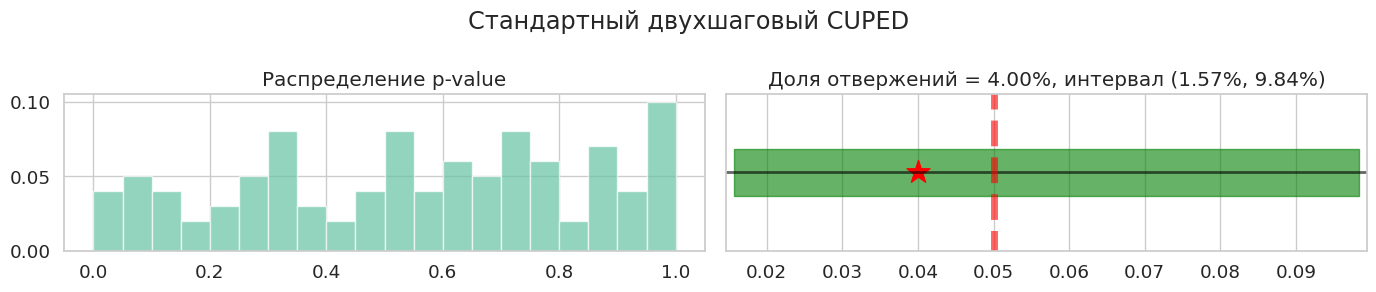

  0%|          | 0/100 [00:00<?, ?it/s]

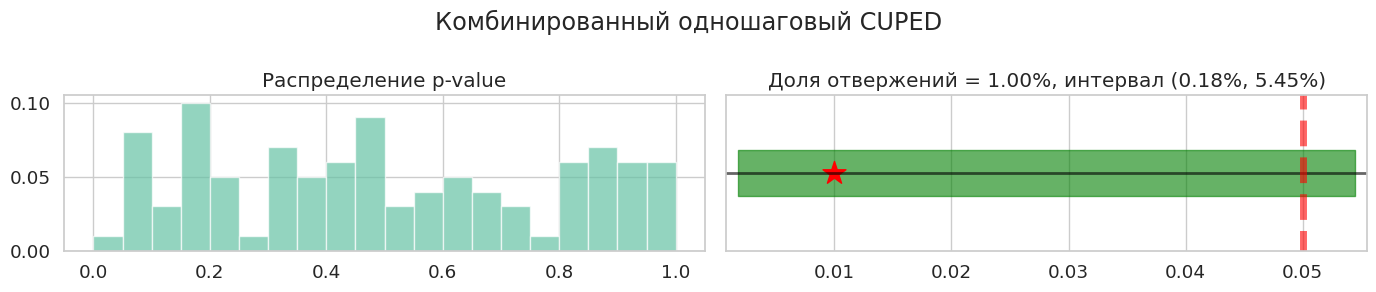

  0%|          | 0/100 [00:00<?, ?it/s]

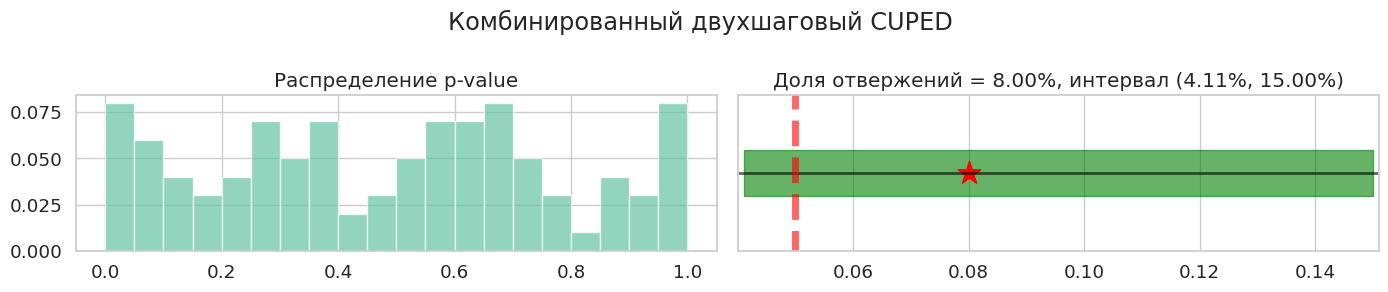

In [7]:
test_list = [
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='default-two-step'
                                 ),
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='comb-one-step'
                                 ),
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='comb-two-step'
                                 ),
]

title_list = [
    'Стандартный двухшаговый CUPED',
    'Комбинированный одношаговый CUPED',
    'Комбинированный двухшаговый CUPED',
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size),
        sample_size=sample_size,
        n_iter=n_iter,
        draw=True,
        title=title,
    )

И мощность на простых данных

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

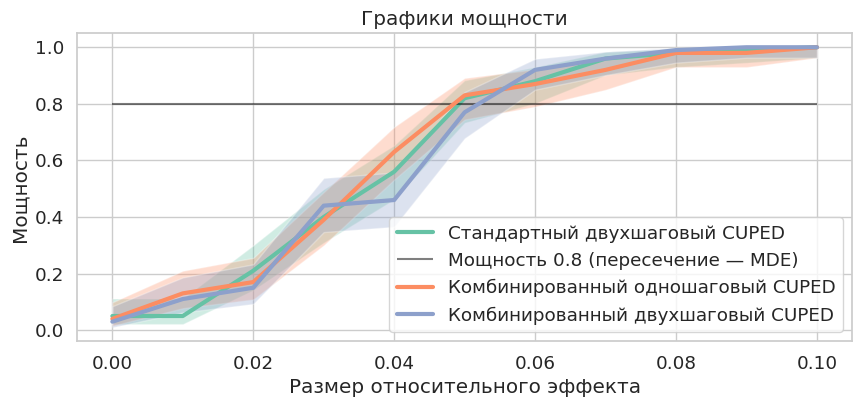

In [8]:
for i, (test, title) in enumerate(zip(test_list, title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size),
        sample_size=sample_size,
        n_iter=n_iter,
    )
    
    draw_power(powers, left_bounds, right_bounds, label=title, new_figure=(i==0))

Теперь гетерокседастичность. Создание выборок будет выглядеть так

In [9]:
def generate_train_test_sample_heteroscedastic(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3
):
    '''
    Генерация всей совокупности объектов (гетерокседастично)

    sample_size -- размер выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- доля увеличения дисперсии на экспериментальном периоде

    Возвращает данные за предэкспериментальный и экспериментальный периоды.
    '''

    base = np.random.gamma(shape=shape, scale=scale, size=sample_size)

    data = pd.DataFrame()

    data['pilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor  * (0.5 + base * 4 / max(base))
    )
    data['prepilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor
    )

    return data

Визуализация новой выборки

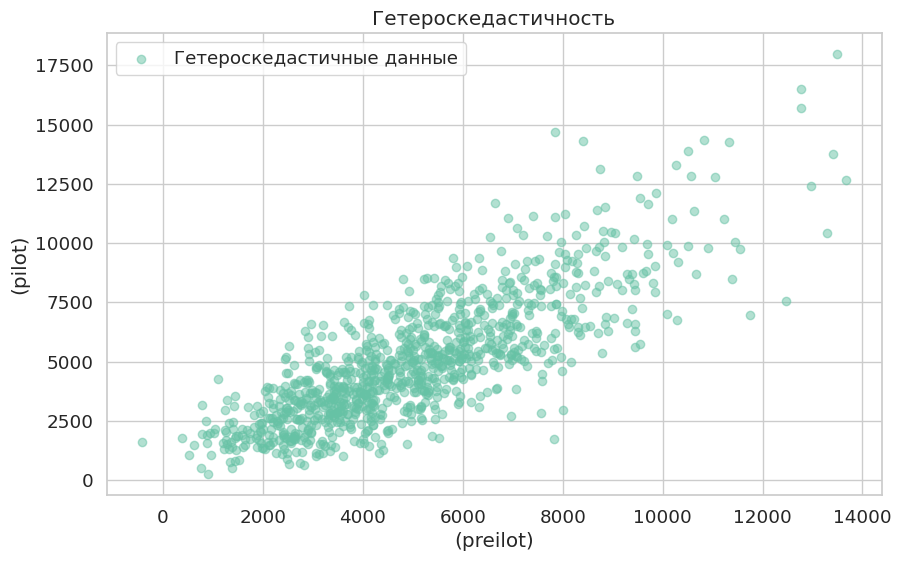

In [10]:
data = generate_train_test_sample_heteroscedastic(sample_size=1000, shape=5,
                                                  scale=1000, scale_factor=0.3)

# Базовые значения (base) и значения с шумом (pilot)
base = np.random.gamma(shape=5, scale=1000, size=1000)
pilot = data['pilot']

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['prepilot'], data['pilot'],
            alpha=0.5, label='Гетероскедастичные данные')
plt.xlabel('(preilot)')
plt.ylabel('(pilot)')
plt.title('Гетероскедастичность')
plt.legend()
plt.grid(True)
plt.show()

Корректность

  0%|          | 0/100 [00:00<?, ?it/s]

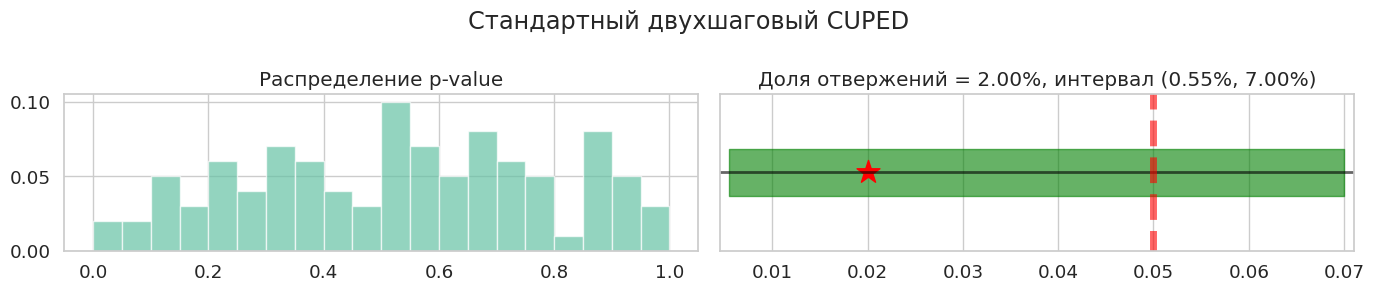

  0%|          | 0/100 [00:00<?, ?it/s]

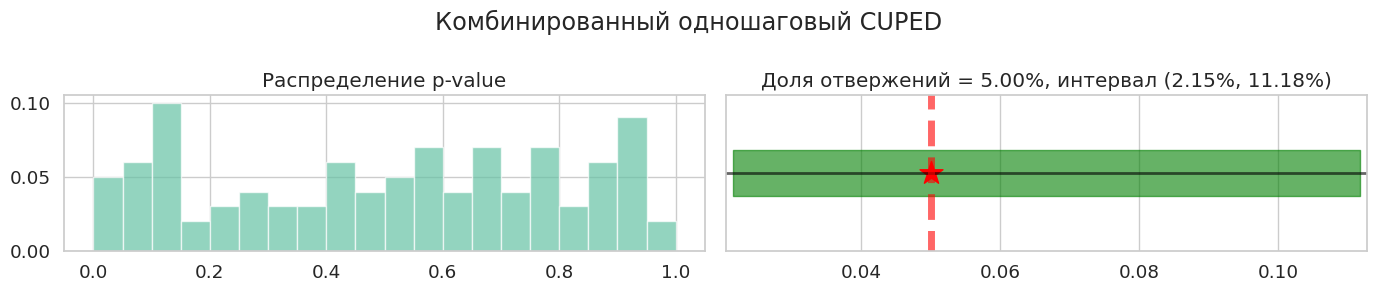

  0%|          | 0/100 [00:00<?, ?it/s]

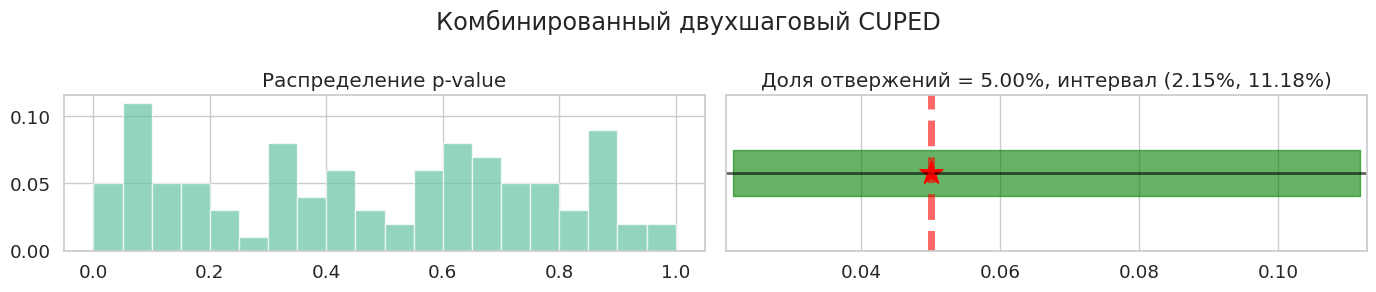

In [11]:
test_list = [
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='default-two-step'
                                 ),
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='comb-one-step'
                                 ),
    lambda x, y: regression_ttest(x, y, cuped=True,
                                  covariate_names=['prepilot'],
                                  type_reg='comb-two-step'
                                 ),
]

title_list = [
    'Стандартный двухшаговый CUPED',
    'Комбинированный одношаговый CUPED',
    'Комбинированный двухшаговый CUPED',
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size,
                                                                        generation_function=generate_train_test_sample_heteroscedastic),
        sample_size=sample_size,
        n_iter=n_iter,
        draw=True,
        title=title,
    )

Мощность на гетерокседастичных данных

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

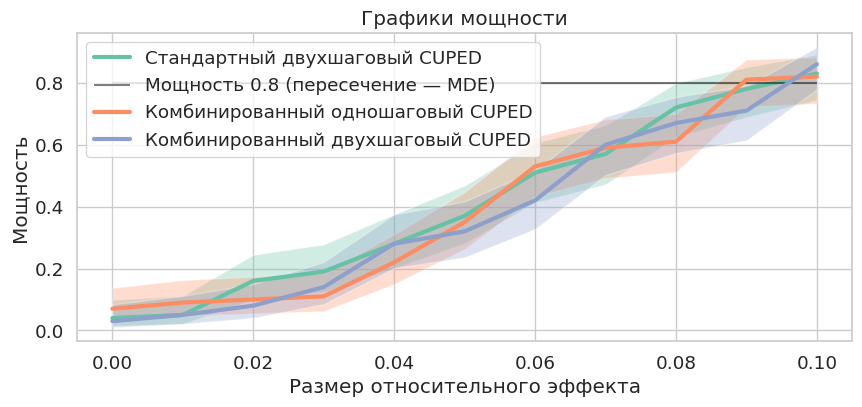

In [12]:
for i, (test, title) in enumerate(zip(test_list, title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size,
                                                                        generation_function=generate_train_test_sample_heteroscedastic),
        sample_size=sample_size,
        n_iter=100,
    )
    
    draw_power(powers, left_bounds, right_bounds, label=title, new_figure=(i==0))

В целом, все методы примерно похожи, и по мощности, и по корректности на всех реализациях данных. Везде они оказались корректными. Вообще говоря, ожидается, что двухшаговая регрессия будет более корректная, чем одношаговая.

Мы используем HC3 и невелируем гетерокседастичность, поэтому она нам не мешает.

## Стратификация

---
### Задача 4.

Пусть в общей совокупности данных имеется $K$ страт, причем вес страты $k \in \{1, ..., K\}$ равен $w_k$, где $w_1+...+w_K=1$. Пусть также выборка размера $n$ выбрана случайно, то есть вероятность выбрать элемент из страты $k$ равна $w_k$.

Посчитайте $\mathsf{E} \frac{1}{n_k}$ с точностью до $o(1/n^2)$, где $n_k$ &mdash; количество элементов выборки из страты $k$.

*Указание.* Разложите по Тейлору функцию $f(x)=1/x$ в точке $x_0\not=0$.

Ясно, что

$$n_k \sim \text{Binom}(n, w_k)$$

Имеем

$$\mathsf E n_k = n w_k \qquad \qquad \qquad \mathsf D n_k^2 = n w_k (1 - w_k)$$

Раскладывая с остаточным членом в форме Лагранжа получаем $\xi \in (x, x_0)$:

$$f(x) = \frac{1}{x_0} - \frac{1}{x_0^2}(x-x_0) + \frac{1}{x_0^3}(x-x_0)^2 - \frac{1}{\xi^4}(x-x_0)^3$$



Беря матожидания от обеих частей при $x_0 = n w_k$:
$$\mathsf E \frac{1}{n_k} = \frac{1}{n w_k} - \frac{1}{(n w_k)^2} (\mathsf E n_k - n w_k) + \frac{1}{(n w_k)^3} \mathsf E(\mathsf E n_k - n w_k)^2 - \frac{1}{\xi^4}\mathsf E(\mathsf E n_k - n w_k)^3$$

Заметим, что мы имеем в слагаемых моменты биномиального распределения. 

Остаток $$r = \frac{1}{\xi^4}\mathsf E(\mathsf E n_k - n w_k)^3$$ будет $o(1/n^2)$, так как третий момент биномиального распределения есть $O(n)$ (просто честно считаем через производящую фунцию и ее третью производную - очевидные выкладки), а $\xi$ эквивалетна $nw_k \sim n$, откуда $r = O(\frac{n}{n^4}) = o(\frac{1}{n^2})$

Имеем:

$$\mathsf E \frac{1}{n_k} = \frac{1}{n w_k} + \frac{1}{(n w_k)^3} nw_k(1-w_k) + o\left(\frac{1}{n^2}\right)$$
$$\mathsf E \frac{1}{n_k} = \frac{n w_k + 1 - w_k}{(n w_k)^2}  + o\left(\frac{1}{n^2}\right)$$
$$\mathsf E \frac{1}{n_k} = \frac{w_k(n-1) + 1}{(n w_k)^2}  + o\left(\frac{1}{n^2}\right)$$

---
### Задача 5.

Пусть $Y_1, ..., Y_n$ &mdash; выборка целевого признака, а $X_1, ..., X_n$ &mdash; соответствующая выборка ковариат. Пусть также все объекты делятся на $K$ страт. Получите формулу значения $\theta$ в методе CUPED при использовании стратифицированного среднего в случае
* стратифицированного семплирования,
* случайного семплирования.

Будем считать, что "при использовании стратифицированного среднего" означает, что мы применяем CUPED следующим образом (к стратифицированному среднему) ($\overline U_k$ означает усреднение по $k$-й страте):

$$z = \sum_{k=1}^K \left[w_k \overline Y_k - \theta (w_k \overline X_k - w_k \mathsf E X_k)\right]$$

То есть величина $z$ будет использоваться в t-test'е и вычисляться по эксперементальной и контрольной выборкам. Мы хотим минимизировать ее дисперсию:

$$\mathsf D z = \mathsf D \left(\sum_k\left[w_k \overline Y_k - \theta w_k \overline X_k\right]\right)$$

Разбивая на сумму дисперсий по независимым подвыборкам (в $k$-й страте $I_k$ элементов, $X_k, Y_k$ - с.в. из $k$-й страты):

$$\mathsf D z = \sum_k w_k^2\mathsf D(\overline Y_k - \theta \overline X_k) = \sum_k\frac{w_k^2}{I_k} \mathsf D(Y_k - \theta X_k) = \sum_k\frac{w_k^2}{I_k} \left[ \mathsf D Y_k + \theta^2 \mathsf D X_k - 2 \theta \text{cov}(Y_k, X_k)\right] $$

Минимизируя получаемую квадратичную функцию, имеем:

$$\frac{\partial \mathsf Dz}{\partial \theta} = 0 = \sum_k \frac{w_k^2 \mathsf D X_k}{I_k} 2\theta - 2\sum_k\frac{w_k^2 \text{cov}(Y_k, X_k)}{I_k}$$

$$\theta = \frac{\sum_k\frac{w_k^2}{I_k} \text{cov}(Y_k, X_k)}{\sum_k \frac{w_k^2}{I_k}\mathsf D X_k}$$

Для случайного сэмплирования формула так и останется выглядеть (мы ничего дополнительно про $I_k$ сказать не можем), а для стратифицированного имеем (при размере выборки $n$: $I_k = w_k n$):

$$\theta = \frac{\sum_k w_k \text{cov}(Y_k, X_k)}{\sum_k w_k\mathsf D X_k}$$

---
### Задача 6.

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности 
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

Кода в ноутбуке с занятия особо нет. Моя идея такая: сгенерируем большую генеральную совокупность, затем будет сэмплировать оттуда и смотреть на стратифицированное и обычное среднее.

Строим гистограмму

  0%|          | 0/10000 [00:00<?, ?it/s]

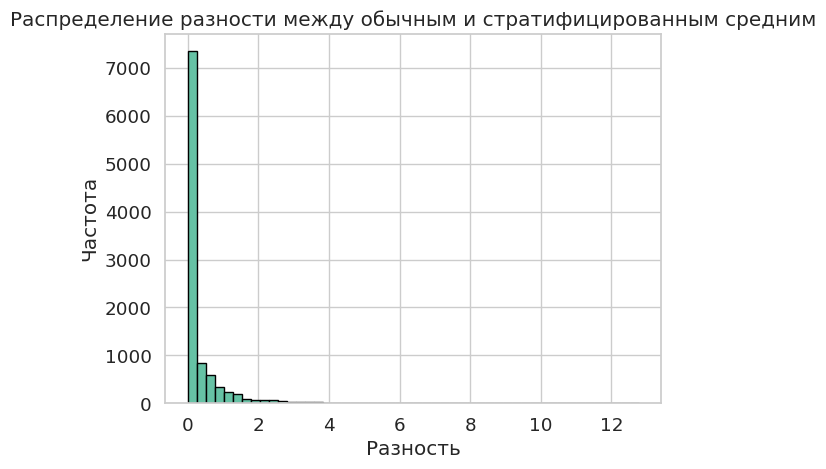

In [126]:
sample_sizes = [100000, 500]
scale = [1, 100]
population = generate_mix_expon(sample_sizes, scale)
population_size = sample_sizes[0] + sample_sizes[1] 

n_experiments = 10000
differences = []

for _ in tqdm(range(n_experiments)):
    sample_size = 100
    sample_indices = np.random.choice(len(population),
                                      size=sample_size,
                                      replace=False)
    sample = population[sample_indices]

    stratum1_indices = sample_indices[sample_indices < sample_sizes[0]]
    stratum2_indices = sample_indices[sample_indices >= sample_sizes[0]]

    stratum1_values = population[stratum1_indices]
    stratum2_values = population[stratum2_indices]

    #count_in_stratum1 = np.sum((sample_indices <= sample_sizes[0]))
    #count_in_stratum2 = sample_size - count_in_stratum1
    
    simple_mean = np.mean(sample)
    
    mean_stratum1 = np.mean(stratum1_values) if len(stratum1_values) > 0 else 0
    mean_stratum2 = np.mean(stratum2_values) if len(stratum2_values) > 0 else 0

    # Вычисление стратифицированного среднего
    stratified_mean = (
        sample_sizes[0] * mean_stratum1
        + sample_sizes[1] * mean_stratum2
    ) / (sample_sizes[0] + sample_sizes[1])
    
    differences.append(simple_mean - stratified_mean)

plt.hist(differences, bins=50, edgecolor='black')
plt.title('Распределение разности между обычным и стратифицированным средним')
plt.xlabel('Разность')
plt.ylabel('Частота')
plt.show()

У этой гистограммы есть хвост, обычное среднее имеет выбросы: когда в выборку попадает элемент из второй страты он сильно перекашивает статистику. При этом стратифицированное среднее более устойчиво

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Стратификация меняет распределение статистики, по которой считается t-test. Это может быть, например, систематическая ошибка в оценке самих стратификаций (вероятностей страт)

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Да. Можно, например, бустрепить нужную статитику и найти ее распределение

Реализуйте эту процедруру.

Для начала, вспомогательные функции

In [128]:
sample_sizes = [100000, 5000]
scale = [1, 100]

def count_mean(sample_indices, effect_func=None):
    ''' Подсчет среднего. '''
    if effect_func is not None:
        return np.mean(effect_func(data[sample_indices]))
    return np.mean(data[sample_indices])
    
def count_strat_mean(sample_indices, effect_func=None):
    ''' Подсчет стратифицированного среднего. '''
    stratum1_indices = sample_indices[sample_indices < sample_sizes[0]]
    stratum2_indices = sample_indices[sample_indices >= sample_sizes[0]]

    
    stratum1_values = data[stratum1_indices]
    stratum2_values = data[stratum2_indices]
    
    if effect_func is not None:
        all_values = np.concatenate([stratum1_values, stratum2_values])
        all_values = effect_func(all_values)
        stratum1_values, stratum2_values = all_values[:len(stratum1_values)], all_values[len(stratum1_values):]

    mean_stratum1 = np.mean(stratum1_values) if len(stratum1_values) > 0 else 0
    mean_stratum2 = np.mean(stratum2_values) if len(stratum2_values) > 0 else 0

    stratified_mean = (
        sample_sizes[0] * mean_stratum1
        + sample_sizes[1] * mean_stratum2
    ) / (sample_sizes[0] + sample_sizes[1])
    
    return stratified_mean

def compute_bootstrap_stats(data, B=5000, sample_size=100,
                            stat_func=count_strat_mean):
    '''
    Рассчет бутстрепных статистик.
    
    Аргументы:
    data -- данные
    B -- количество бутстрепных выборок
    sample_size -- размер бустрепной выборки
    stat_func -- функция для расчета статистики критерия
    
    Возвращает:
    boot_stats -- массив рассчитанных статистик
    '''
    boot_samples_indices = [np.random.choice(len(data), size=sample_size * 2,
                                     replace=True) for _ in range(B)]
    boot_stats = []
    for sample_indices in boot_samples_indices:
        boot_sample1_indices = sample_indices[:sample_size]
        boot_sample2_indices = sample_indices[sample_size:]
        boot_stat = stat_func(boot_sample1_indices) - stat_func(boot_sample2_indices)
        boot_stats.append(boot_stat)
    
    return np.array(boot_stats)

def compute_p_value(boot_stats, stat_original, alternative="two-sided"):
    '''
    Рассчет p-value на основе бутстрепных статистик для разных альтернатив.
    
    Аргументы:
    boot_stats -- массив бутстрепных статистик
    stat_original -- исходная статистика критерия
    alternative -- альтернатива: "two-sided", "greater", "less"
    
    Возвращает:
    p-value
    '''
    if alternative == "two-sided":
        return 2 * min(
            np.mean(boot_stats >= stat_original),
            np.mean(boot_stats <= stat_original)
        )
    elif alternative == "greater":
        return np.mean(boot_stats >= stat_original)
    elif alternative == "less":
        return np.mean(boot_stats <= stat_original)
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")

def bootstrap_t_test(boot_stats, x, y,
                     stat_func=count_strat_mean,
                     alternative='two-sided'):
    '''
    Оценка статистики критерия, доверительного интервала и p-value на основе бутстрепных выборок.
    
    Аргументы:
    boot_stats -- статистики бутстрепных выборок
    x -- тестовая выборка
    y -- контрольная выборка
    stat_func -- функция для расчета статистики критерия
    alternative -- вид альтернативы (по умолчанию двусторонняя). Возможные знаечения:
     'two-sided', 'greater' или 'less'
    
    Возвращает:
    Словарь с оригинальной статистикой, доверительным интервалом и p-value
    '''
    
    if alternative == "two-sided":
        ci_lower, ci_upper = np.percentile(boot_stats, [2.5, 97.5])
    elif alternative == "greater":
        ci_lower, ci_upper = np.percentile(boot_stats, [5, 100])
    elif alternative == "less":
        ci_lower, ci_upper = np.percentile(boot_stats, [0, 95])
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")
    
    stat_original = stat_func(x) - stat_func(y)
    
    p_value = compute_p_value(boot_stats, stat_original)
    
    return [stat_original, p_value]



Имеем

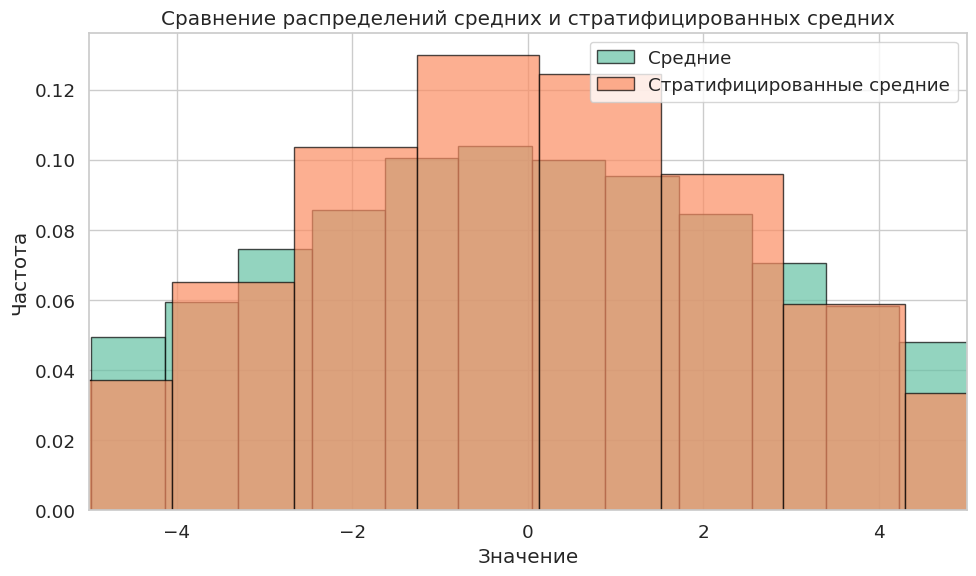

In [129]:
data = generate_mix_expon(sample_sizes, scale)

boot_stats_strat = compute_bootstrap_stats(data, B=50000,
                                         sample_size=100,
                                         stat_func=count_strat_mean)
boot_stats_mean = compute_bootstrap_stats(data, B=50000,
                                         sample_size=100,
                                         stat_func=count_mean)

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.

Генерация выборки

In [130]:
def sample_generation(size=100):
    x = data[np.random.choice(len(data), size=sample_size,
                                     replace=False)]
    y = data[np.random.choice(len(data), size=sample_size,
                                     replace=False)]
    return x, y

def indices_generation(size=100):
    x = np.random.choice(len(data), size=sample_size,
                                     replace=False)
    y = np.random.choice(len(data), size=sample_size,
                                     replace=False)
    return x, y


Валидация

  0%|          | 0/1000 [00:00<?, ?it/s]

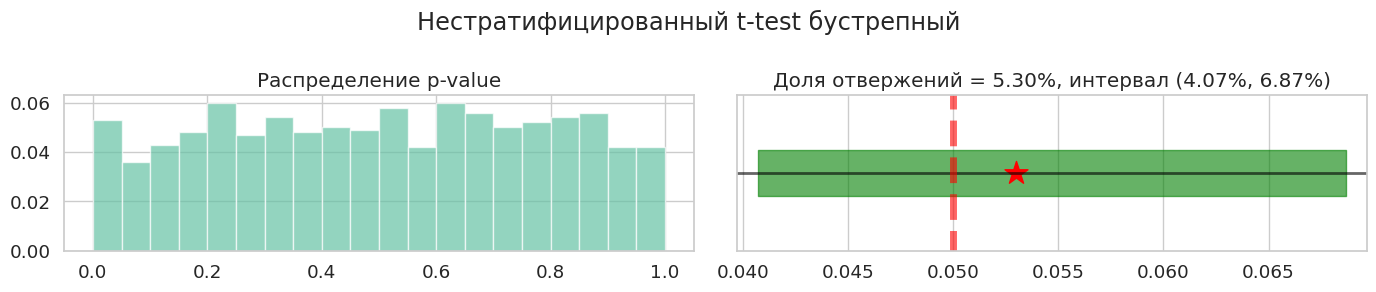

  0%|          | 0/1000 [00:00<?, ?it/s]

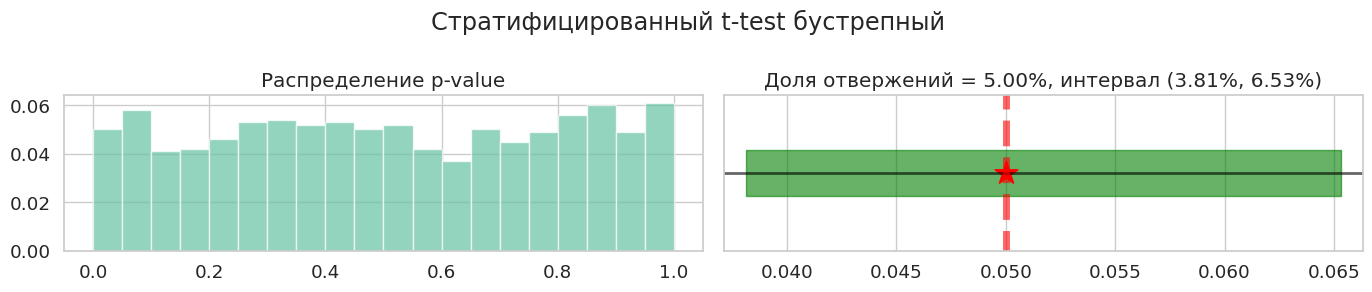

  0%|          | 0/1000 [00:00<?, ?it/s]

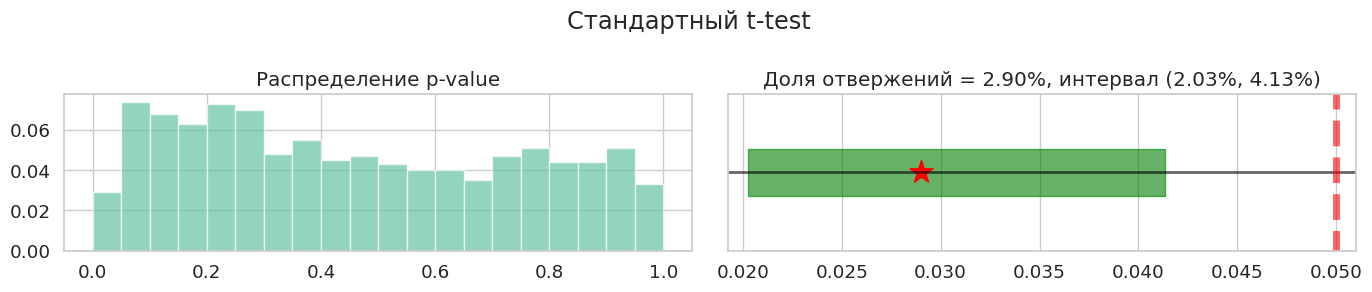

In [131]:
test_list = [
    lambda x, y: bootstrap_t_test(boot_stats_mean, x, y,
                                  stat_func=count_mean
                                 ),
    lambda x, y: bootstrap_t_test(boot_stats_strat, x, y,
                                  stat_func=count_strat_mean
                                 ),
    lambda x, y: sps.ttest_ind(x, y, equal_var=False),
]

title_list = [
    'Нестратифицированный t-test бустрепный',
    'Стратифицированный t-test бустрепный',
    'Стандартный t-test',
]

generate_list = [
    indices_generation,
    indices_generation,
    sample_generation
]


for test, title, generation_func in zip(test_list, title_list, generate_list):
    run_experiments(
        test=test,
        generate_samples=generation_func,
        sample_size=100,
        n_iter=1000,
        draw=True,
        title=title,
    )

И мощности

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

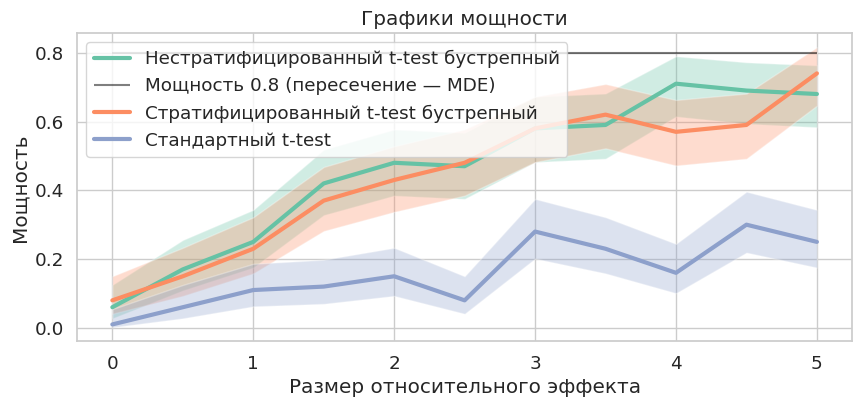

In [132]:
test_list = [
    lambda x, y, func: bootstrap_t_test(boot_stats_mean, x, y,
                                  stat_func=lambda sample: count_mean(sample, func)
                                 ),
    lambda x, y, func: bootstrap_t_test(boot_stats_strat, x, y,
                                        stat_func=lambda sample: count_strat_mean(sample, func)
                                 ),
    lambda x, y: sps.ttest_ind(x, y, equal_var=False),
]

for i, (test, title, gen_func) in enumerate(zip(test_list, title_list, generate_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=gen_func,
        sample_size=100,
        n_iter=100,
        effects_list=np.linspace(0, 5, 11),
        add_effect_as_func=i!=2
    )
    
    draw_power(powers, left_bounds, right_bounds,
               label=title, new_figure=(i==0), effects_list=np.linspace(0, 5, 11))

Отсюда видно, что бустреп позволяет выиграть в мощности. Однако, может оказаться так, что он будет проигрывать, если вторая страта маленькая (тогда выигрывает стандартный t-test). При этом бустреп позволяет невелировать выбросы обычного среднего. Все бустрепы корректны, t-test оказался тоже.